# LSTM을 이용한 로이터 뉴스 카테고리 분류하기

목표: 모델이 텍스트를 입력 받아 적절한 의미 범주로 분류한다.

## 데이터셋 불러오기

In [45]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters

In [46]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000, test_split=0.2)

## 데이터 확인 및 전처리

In [47]:
# 데이터 확인하기
import numpy as np

category = np.max(train_labels) + 1
print(category, '범주')
print(len(train_data), '훈련용 뉴스 기사')
print(len(test_data), '시험용 뉴스 기사')
print(train_data[0])
print(len(train_data[0]))

46 범주
8982 훈련용 뉴스 기사
2246 시험용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
87


In [48]:
# 데이터 전처리
from keras.preprocessing import sequence

train_data = sequence.pad_sequences(train_data, maxlen=100)
test_data = sequence.pad_sequences(test_data, maxlen=100)

train_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   2,   2,   8,  43,  10, 447,   5,  25, 207, 270,   5,   2,
       111,  16, 369, 186,  90,  67,   7,  89,   5,  19, 102,   6,  19,
       124,  15,  90,  67,  84,  22, 482,  26,   7,  48,   4,  49,   8,
       864,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22, 155,  11,
        15,   7,  48,   9,   2,   2, 504,   6, 258,   6, 272,  11,  15,
        22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,  52,  29,
       209,  30,  32, 132,   6, 109,  15,  17,  12])

In [49]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=46)
test_labels = to_categorical(test_labels, num_classes=46)

In [50]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 모델 구성

In [51]:
# 모델 구성
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [ ]:
## 모델 학습
import tensorflow
#with tensorflow.device('/GPU:0'):
history = model.fit(train_data, train_labels,
                    epochs = 20,
                    batch_size = 100,
                    validation_split = 0.2)

In [87]:
history.history

{'loss': [2.442171573638916,
  2.0528552532196045,
  1.8845064640045166,
  1.7861841917037964,
  1.697594404220581,
  1.590392827987671,
  1.4981356859207153,
  1.4284601211547852,
  1.349707007408142,
  1.2898228168487549,
  1.2321956157684326,
  1.1773247718811035,
  1.1310105323791504,
  1.0895577669143677,
  1.0512560606002808,
  1.0041013956069946,
  0.9772356748580933,
  0.9503331184387207,
  0.9217619299888611,
  0.8934959173202515],
 'accuracy': [0.373973548412323,
  0.47613081336021423,
  0.5096729397773743,
  0.5433542132377625,
  0.5608907341957092,
  0.5905358195304871,
  0.6100208759307861,
  0.6282532811164856,
  0.6450939178466797,
  0.6627696752548218,
  0.6818371415138245,
  0.6929714679718018,
  0.703827440738678,
  0.7198329567909241,
  0.7290188074111938,
  0.7395963668823242,
  0.7466945052146912,
  0.7551844120025635,
  0.7628392577171326,
  0.7696589827537537],
 'val_loss': [2.072445869445801,
  2.016538143157959,
  1.7563740015029907,
  1.7561826705932617,
  1.7

## 테스트

In [55]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
# 테스트 정확도 출력
evaluataions = model.evaluate(test_data, test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 1.3165 - accuracy: 0.6874


In [61]:
evaluataions

[1.3165498971939087, 0.6874443292617798]

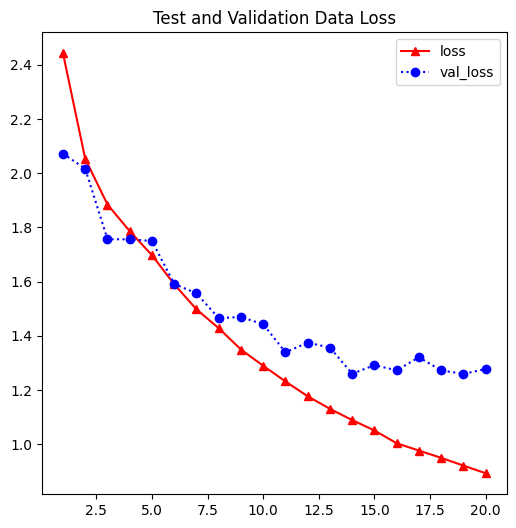

In [108]:
# 학습 곡선 그리기
import matplotlib.pyplot as plt

epochs = 20

plt.figure(figsize=(6,6))
plt.title("Test and Validation Data Loss")
plt.plot(range(1, epochs+1), history.history['loss'], 'r^-', label = 'loss')
plt.plot(range(1, epochs+1), history.history['val_loss'], 'bo:', label = 'val_loss')
plt.legend()

plt.show()

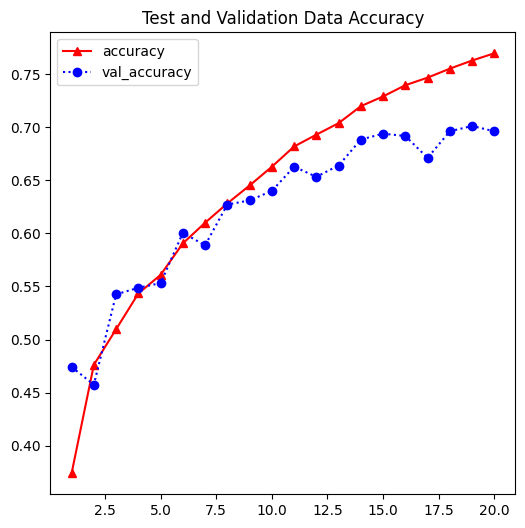

In [109]:
plt.figure(figsize=(6,6))
plt.title("Test and Validation Data Accuracy")
plt.plot(range(1, epochs+1), history.history['accuracy'], 'r^-', label = 'accuracy')
plt.plot(range(1, epochs+1), history.history['val_accuracy'], 'bo:', label = 'val_accuracy')
plt.legend()

plt.show()